In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt


In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import matplotlib.pyplot as plt
import numpy as np

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from google.colab import files
file = files.upload()

Saving x_test.xlsx to x_test.xlsx
Saving x_train.xlsx to x_train.xlsx
Saving y_test.xlsx to y_test.xlsx
Saving y_train.xlsx to y_train.xlsx


In [ ]:
x_train = pd.read_excel('x_train.xlsx')
y_train = pd.read_excel('y_train.xlsx')
x_test = pd.read_excel('x_test.xlsx')
y_test = pd.read_excel('y_test.xlsx')

In [ ]:
x_train

,Junc 10,Junc 11,Junc 12,Junc 13,Junc 21,Junc 22,Junc 23,Junc 31,Junc 32
0,111.07,110.90,115.38,116.56,113.70,115.94,118.04,112.15,107.41
1,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
2,119.99,110.67,108.43,109.34,107.60,109.12,111.03,104.55,99.24
3,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
4,128.59,120.45,118.35,119.99,118.94,120.07,122.05,117.15,112.09
...,...,...,...,...,...,...,...,...,...
512,127.54,119.26,117.02,118.67,117.66,118.76,120.74,115.86,110.79
513,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
514,129.25,121.20,119.63,120.91,119.35,120.82,122.78,117.01,111.89
515,124.13,115.38,115.77,114.57,104.34,109.86,112.08,38.80,57.30


In [ ]:
x_test

,Junc 10,Junc 11,Junc 12,Junc 13,Junc 21,Junc 22,Junc 23,Junc 31,Junc 32
0,121.26,112.11,116.94,118.08,115.10,117.40,119.51,113.57,108.85
1,121.17,112.02,115.50,116.39,113.54,115.71,117.77,111.35,106.43
2,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
3,123.80,115.01,114.84,113.58,107.14,109.52,111.69,82.28,17.35
4,128.59,120.45,118.35,119.99,118.94,120.07,122.05,117.15,112.09
...,...,...,...,...,...,...,...,...,...
126,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89
127,129.96,122.01,120.53,121.80,120.21,121.71,123.67,117.88,112.76
128,125.52,116.96,116.93,108.58,107.46,104.74,87.75,104.71,97.99
129,130.28,122.37,121.40,122.23,120.13,121.88,123.82,117.13,111.89


In [ ]:
x_train = torch.tensor(x_train.to_numpy(), dtype=torch.float32)
x_test = torch.tensor(x_test.to_numpy(), dtype=torch.float32)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long).squeeze()  # Assuming y_train is binary (0 or 1)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long).squeeze()

In [ ]:
from torch.utils.data import DataLoader, TensorDataset
# Create a DataLoader for training and testing data
train_dataset = TensorDataset(x_train, y_train)
train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)

In [ ]:
# Define a simple neural network model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(NeuralNetwork, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.relu = nn.ReLU()
        self.fc2 = nn.Linear(hidden_size, num_classes)

    def forward(self, x):
        out = self.fc1(x)
        out = self.relu(out)
        out = self.fc2(out)
        # out = torch.sigmoid(out)
        return out

In [ ]:
# Initialize the model, loss function, and optimizer
input_size = x_train.shape[1]
hidden_size = 64
num_classes = 2  # Binary classification, so two output classes
model = NeuralNetwork(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [ ]:
# Train the model
num_epochs = 100
for epoch in range(num_epochs):
    for inputs, labels in train_loader:
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

In [ ]:
from sklearn.metrics import accuracy_score
# Evaluate the model on the test data
with torch.no_grad():
    model.eval()
    y_pred = model(x_test)
    _, predicted = torch.max(y_pred, 1)
    accuracy = accuracy_score(y_test.numpy(), predicted.numpy())

print(f"Accuracy on test data: {accuracy * 100:.2f}%")

Accuracy on test data: 98%


In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = LogisticRegression()
model1.fit(x_train,y_train)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
model1.score(x_test,y_test)


0.8473282442748091

In [ ]:
y_pred1 = model1.predict(x_test)
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred1))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred1))
print("MMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred1)))

MAE :  0.15267175572519084
MSE :  0.15267175572519084
MMSE :  0.39073233258228174


<ipython-input-37-d3dd611c5ada>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred1)


<Axes: ylabel='Density'>

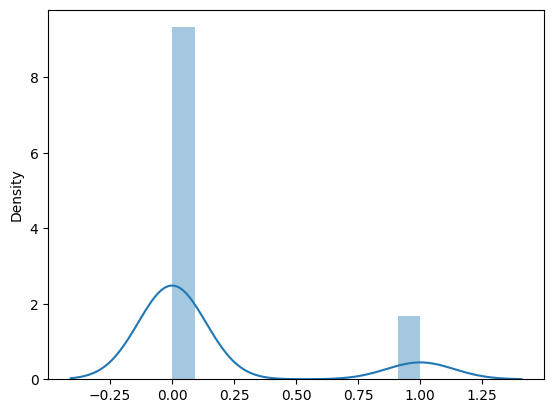

In [ ]:
sns.distplot(y_test-y_pred1)

In [ ]:
#model2  = random forest
from sklearn.ensemble import RandomForestRegressor as rfr
model2 = rfr()

model2.fit(x_train,y_train)
model2.score(x_test,y_test)

0.9700229962519945

<ipython-input-39-b9e2e55fbb8f>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred2)


<Axes: ylabel='Density'>

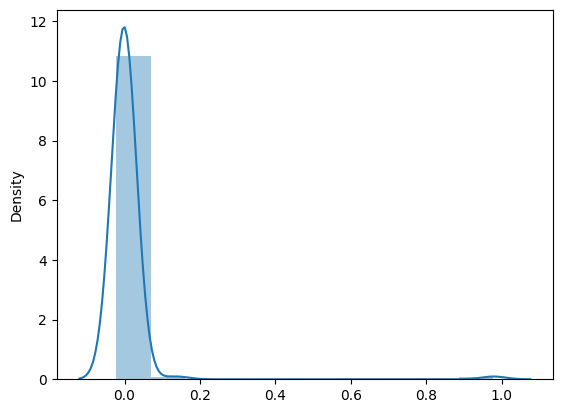

In [ ]:
y_pred2 = model2.predict(x_test)
sns.distplot(y_test-y_pred2)

In [ ]:
metrics.r2_score(y_test,y_pred2)


0.9700229962519945

In [ ]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred2))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred2))
print("MMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred2)))

MAE :  0.010481421322983336
MSE :  0.007493814234540146
MMSE :  0.08656681947802025


In [ ]:
# prompt: import svm model from sklearn and then fit x_train ,y_train and then find the accuracy on x_test,y_test

from sklearn.svm import SVC
model_svc = SVC()
model_svc.fit(x_train, y_train)
model_svc.score(x_test, y_test)


0.9541984732824428

In [ ]:
y_pred_svc = model_svc.predict(x_test)

In [ ]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred_svc))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred_svc))
print("MMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred_svc)))

MAE :  0.04580152671755725
MSE :  0.04580152671755725
MMSE :  0.2140129125019265


In [ ]:
#model 3 - decision tree regression
from sklearn.tree import DecisionTreeRegressor as dtr

In [ ]:
model3 = dtr()

In [ ]:
model3.fit(x_train,y_train)
model3.score(x_test,y_test)

0.970662601860949

In [ ]:
y_pred3 = model3.predict(x_test)

<ipython-input-49-46b3d6849799>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred3)


<Axes: ylabel='Density'>

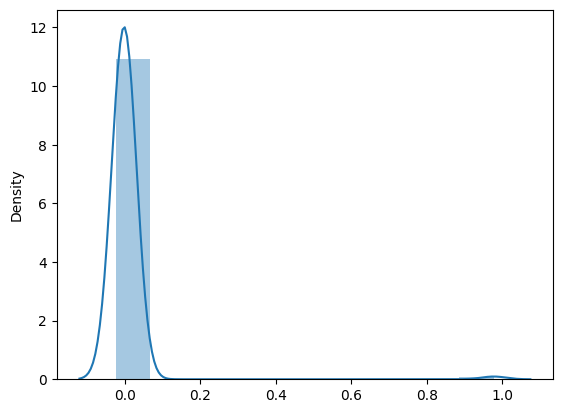

In [ ]:
sns.distplot(y_test-y_pred3)

In [ ]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred3))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred3))
print("MMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred3)))

MAE :  0.009368494101318528
MSE :  0.00733392215002208
MMSE :  0.08563832173753803


In [ ]:
# model4 - xgboost
from xgboost import XGBRegressor


In [ ]:
model4 = XGBRegressor()


In [ ]:
model4.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
model4.score(x_test,y_test)

0.9415085298858331

In [ ]:
y_pred4 = model4.predict(x_test)

<ipython-input-56-d9ffaeed6f71>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test-y_pred4)


<Axes: ylabel='Density'>

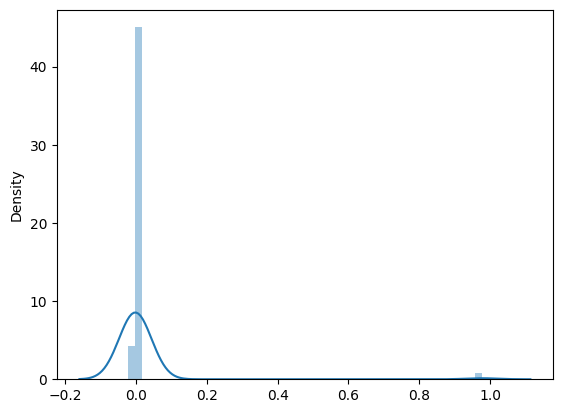

In [ ]:
sns.distplot(y_test-y_pred4)

In [ ]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred4))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred4))
print("MMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

MAE :  0.01688260625284596
MSE :  0.014622015429740462
MMSE :  0.12092152591553111


In [ ]:
#hyperparameter tuning


In [ ]:
# tuning model4

params = {
    "n_estimators" : [100,300,500,700,1000,1200,1500],
    "learning_rate" : [0.05,0.10,0.15],
    "max_depth" : [8,10,12,15],
    "min_child_weight" : [1,2,3,5],
    "gamma" : [0.0,0.2,0.4,0.5],
    "colsample_bytree" : [0.3,0.4,0.5]



}




In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV


In [ ]:
random_search = RandomizedSearchCV(model4, param_distributions = params,n_iter = 5, scoring = 'roc_auc',n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=False,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=...
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=None, ...),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.3, 0.4, 0.5],
                                        'gamma': [0.0, 0.2, 0.4, 0.5],
                                        'learning_rate': [0.05, 0.1, 0.15],
                                        'max_depth': [8, 10, 12, 15],
                                        'min_child_weight': [1, 2, 3, 5],
                                        'n_estimators': [100, 300, 500, 700,
                                                         1000, 1200, 1500]},
                   scoring='roc_auc', verbose=3)

In [ ]:
random_search.best_params_

{'n_estimators': 1200,
 'min_child_weight': 1,
 'max_depth': 15,
 'learning_rate': 0.1,
 'gamma': 0.0,
 'colsample_bytree': 0.3}

In [ ]:
hypermodel4 = XGBRegressor(n_estimators=1200,gamma = 0.0,learning_rate= 0.1,max_depth= 15,min_child_weight= 1,colsample_bytree=0.3)

In [ ]:
hypermodel4.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.3, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=0.0, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=15, max_leaves=None,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1200, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [ ]:
hypermodel4.score(x_test,y_test)

0.9898213371505914

In [ ]:
print("MAE : ", metrics.mean_absolute_error(y_test,y_pred4))
print("MSE : ", metrics.mean_squared_error(y_test,y_pred4))
print("MMSE : ", np.sqrt(metrics.mean_squared_error(y_test,y_pred4)))

MAE :  0.01688260625284596
MSE :  0.014622015429740462
MMSE :  0.12092152591553111


In [ ]:
#hyperparameter tuning of the model2 random forest

rand_param= {'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 3, 4,5],
 'min_samples_split': [2, 4, 6, 10],
 'n_estimators': [10, 50, 100,200, 400, 600, 800, 1000, 1200]
 }

In [ ]:
random_search2 = RandomizedSearchCV(model2, param_distributions = rand_param,n_iter = 5,n_jobs=-1,cv=5,verbose=3)

In [ ]:
random_search2.fit(x_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_iter=5, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [10, 50, 100, 200, 400,
                                                         600, 800, 1000,
                                                         1200]},
                   verbose=3)

In [ ]:
random_search2.best_params_

{'n_estimators': 1000,
 'min_samples_split': 4,
 'min_samples_leaf': 3,
 'max_features': 'auto',
 'max_depth': 50,
 'bootstrap': False}

In [ ]:
from sklearn.ensemble import RandomForestRegressor as rfr

In [ ]:
hypermodel2 = rfr(bootstrap = False,max_depth= 50,max_features= 'auto',min_samples_leaf= 3,min_samples_split= 4,n_estimators= 1000)

hypermodel2.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomForestRegressor(bootstrap=False, max_depth=50, max_features='auto',
                      min_samples_leaf=3, min_samples_split=4,
                      n_estimators=1000)

In [ ]:
hypermodel2.score(x_test,y_test)

0.970662601860949

Comparison and Analysis.

In [ ]:
# Neural Network - 98
# Logistic Regression- 84
# Random Forest- 97
# SVM - 95
# Descsion Tree- 97
# XGBoost - 94

#Random Forest (Hyperparameter Tuned)- 97%
#XGBoost (Hyperparameter Tuned)- 99

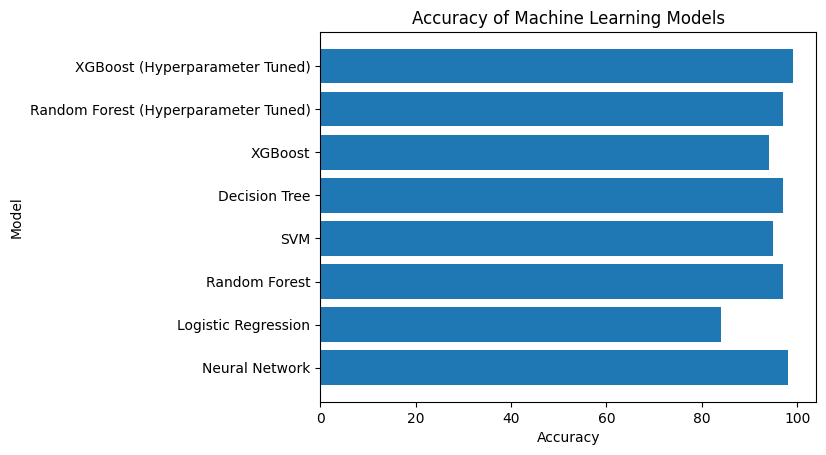

In [ ]:
# prompt: Plot beutiful Bargraph for this data  horizontal  # Neural Network - 98 # Logistic Regression- 84 # Random Forest- 97 # SVM - 95 # Descsion Tree- 97 # XGBoost - 94  #Random Forest (Hyperparameter Tuned)- 97% #XGBoost (Hyperparameter Tuned)- 99

import matplotlib.pyplot as plt
import numpy as np
# Create a list of the models and their accuracies
models = ['Neural Network', 'Logistic Regression', 'Random Forest', 'SVM', 'Decision Tree', 'XGBoost', 'Random Forest (Hyperparameter Tuned)', 'XGBoost (Hyperparameter Tuned)']
accuracies = [98, 84, 97, 95, 97, 94, 97, 99]
# Create a bar chart
plt.barh(models, accuracies)
# Add a title and labels
plt.title('Accuracy of Machine Learning Models')
plt.xlabel('Accuracy')
plt.ylabel('Model')
# Show the plot
plt.show()
